# 우크라이나 전쟁 뉴스 분석
우크라이나 전쟁 관련 기사 분석을 위한 LDA topic modeling  
**유튜브 문송랩-https://www.youtube.com/channel/UCbIPcqbzii5xEnTv_6XGzCA**   

### 패키지 불러오기

In [4]:
import pandas as pd

### 데이터 불러오기

In [69]:
df = pd.read_excel('NewsResult_20220426-20220726.xlsx')

/Users/brightcircle/miniconda3/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [70]:
df.head()

,뉴스 식별자,일자,언론사,기고자,제목,통합 분류1,통합 분류2,통합 분류3,사건/사고 분류1,사건/사고 분류2,사건/사고 분류3,인물,위치,기관,키워드,특성추출(가중치순 상위 50개),본문,URL,분석제외 여부
0,1.500601e+06,20220726,매일신문,문화부,[수요일 아침] 윤 대통령의 지지율 추락,정치>청와대,정치>국회_정당,정치>선거,범죄>범죄일반>사기,NaN,NaN,"문,윤석열,검찰총장,배한동","서해,우크라이나,경기,북송,한국,탕평","미디어,보건복지부,인수위,정부,검찰,경북대","대통령,지지율,추락,명예교수,배한동,경북대,명예,교수,윤석열,정부,국정,지지율,추락...","지지율,윤석열,공무원,협치,지지층,스테핑,경북대,배한동,서해",윤석열 정부의 국정 지지율이 추락했다. 지난 5월 10일 출범한 윤석열 정부가 이렇...,https://news.imaeil.com/page/view/202207251130...,NaN
1,2.100701e+06,20220726,헤럴드경제,홍성원 기자,"美, 우크라戰 덕에 상반기 최대 LNG 수출국 돼",국제>국제일반,경제>무역,경제>자동차,NaN,NaN,NaN,NaN,"우크라이나,걸프만,미국,사빈패스,우크라,유럽,카타르,네덜란드,아프리카,美,영국,일평...","미국,CE,MMBtu,LNG,유럽,TTF,에너지정보청,EU,아시아,영국,유럽연합,E...","우크라,상반기,최대,LNG,수출국,미국,우크라이나,전쟁,유럽,액화,천연가스,LNG,...","상반기,미국,유럽,lng,러시아,천연가스,일평균,우크라이나,입방피트,수출량,국가들,...",[헤럴드경제=홍성원 기자]미국이 우크라이나 전쟁 이후 유럽에 대한 액화천연가스(LN...,http://biz.heraldcorp.com/view.php?ud=20220726...,NaN
2,2.100601e+06,20220726,한국경제,류은혁,"[마켓프로] 삼성전자, 지금 담아야 할까 눈여겨볼 포인트 세 가지",경제>증권_증시,경제>반도체,경제>유통,NaN,NaN,NaN,"박유악,김동원,김운호,최도연","우크라이나,미국,경기,텍사스,신흥국","한국거래소,키움증권,미국,IBK투자증권,KB증권,신한금융투자,타깃,에프앤가이드,삼성...","삼성전자,포인트,가지,삼성전자,국민주,국민,1명,주주,연초,전자,증권가,전망,국민주...","삼성전자,반도체,연구원,증권가,목표주가,외국인,영업이익,증권사,미국,투자자,상반기,...",삼성전자가 '국민주'로 불리는 이유는 국민 10명 중 1명이 주주이기 때문입니다. ...,https://www.hankyung.com/finance/article/20220...,NaN
3,8.100401e+06,20220726,YTN,강성웅,"美, 상반기 액화천연가스 수출 1위...유럽이 71% '싹쓸이'",경제>국제경제,국제>유럽_EU,경제>무역,NaN,NaN,NaN,NaN,"우크라이나,영국,유럽,카타르,아프리카,美","미국,YTN,영국,유럽,에너지정보청,유럽연합,러시아","상반기,천연가스,수출,유럽,71%,싹쓸이,우크라이나,전쟁,계기,러시아,유럽,천연가스...","유럽,미국,천연가스,상반기,러시아,lng,우크라이나,아프리카,세제곱,정보청,유럽연합...",우크라이나 전쟁을 계기로 러시아가 유럽에 대한 천연가스의 공급을 줄이면서 미국이 세...,https://www.ytn.co.kr/_ln/0104_202207260958399238,NaN
4,7.100501e+06,20220726,전자신문,전자신문인터넷 양민하 기자,[ET라씨로] 국제 펄프가격 1000달러 돌파...신풍제지 등 제지株↑,경제>증권_증시,경제>부동산,IT_과학>IT_과학일반,NaN,NaN,NaN,NaN,"우크라이나,미국,장,남부산,러시아","무림페이퍼,애플,전자신문,영풍제지,ET라씨,유가증권,신풍제지,산업통상자원부,ET,씽크풀","국제,펄프,가격,달러,돌파,신풍제지,제지,ET라씨,인공지능,AI,선별,주식,정보,신...","ai,신풍제지,전자신문,실시간,씽크풀,1000달러,미국,유가증권시장,무림페이퍼,영풍...",ET라씨로는 인공지능(AI) 기반으로 선별 분석한 주식 정보와 종목 매매 신호를 제...,http://www.etnews.com/20220726000042,NaN


In [71]:
# 컬럼 확인
df.columns

Index(['뉴스 식별자', '일자', '언론사', '기고자', '제목', '통합 분류1', '통합 분류2', '통합 분류3',
       '사건/사고 분류1', '사건/사고 분류2', '사건/사고 분류3', '인물', '위치', '기관', '키워드',
       '특성추출(가중치순 상위 50개)', '본문', 'URL', '분석제외 여부'],
      dtype='object')

In [72]:
# 전체 언론사 확인 
df['언론사'].unique()

array(['매일신문', '헤럴드경제', '한국경제', 'YTN', '전자신문', '머니투데이', '파이낸셜뉴스', '아시아경제',
       '서울경제', '문화일보', '한겨레', '조선일보', 'KBS', '한국일보', '중앙일보', '세계일보',
       '아주경제', '서울신문', '국민일보', '동아일보', '광주일보', '매일경제', '국제신문', '경기일보',
       'OBS', 'SBS', '디지털타임스', '충북일보', '대구일보', '내일신문', '중부매일', '충청일보',
       '전남일보', 'MBC', '대전일보', '충청투데이', '강원도민일보', '강원일보', '중도일보', '전북일보',
       '경향신문', '부산일보', '전북도민일보', '경남도민일보', '영남일보', '경남신문', '울산매일', '경인일보',
       '경상일보', '중부일보', '광주매일신문', '무등일보', '제민일보', '한라일보'], dtype=object)

### 전처리

#### 결측치 확인 (검색)

In [73]:
#통합분류1 컬럼에는 결측치가 없음 - 전체 기사를 통합분류1로 분류가 가능
df[df['통합 분류1'].isna()]

,뉴스 식별자,일자,언론사,기고자,제목,통합 분류1,통합 분류2,통합 분류3,사건/사고 분류1,사건/사고 분류2,사건/사고 분류3,인물,위치,기관,키워드,특성추출(가중치순 상위 50개),본문,URL,분석제외 여부


In [74]:
df[df['사건/사고 분류1'].isna()]

,뉴스 식별자,일자,언론사,기고자,제목,통합 분류1,통합 분류2,통합 분류3,사건/사고 분류1,사건/사고 분류2,사건/사고 분류3,인물,위치,기관,키워드,특성추출(가중치순 상위 50개),본문,URL,분석제외 여부
1,2.100701e+06,20220726,헤럴드경제,홍성원 기자,"美, 우크라戰 덕에 상반기 최대 LNG 수출국 돼",국제>국제일반,경제>무역,경제>자동차,NaN,NaN,NaN,NaN,"우크라이나,걸프만,미국,사빈패스,우크라,유럽,카타르,네덜란드,아프리카,美,영국,일평...","미국,CE,MMBtu,LNG,유럽,TTF,에너지정보청,EU,아시아,영국,유럽연합,E...","우크라,상반기,최대,LNG,수출국,미국,우크라이나,전쟁,유럽,액화,천연가스,LNG,...","상반기,미국,유럽,lng,러시아,천연가스,일평균,우크라이나,입방피트,수출량,국가들,...",[헤럴드경제=홍성원 기자]미국이 우크라이나 전쟁 이후 유럽에 대한 액화천연가스(LN...,http://biz.heraldcorp.com/view.php?ud=20220726...,NaN
2,2.100601e+06,20220726,한국경제,류은혁,"[마켓프로] 삼성전자, 지금 담아야 할까 눈여겨볼 포인트 세 가지",경제>증권_증시,경제>반도체,경제>유통,NaN,NaN,NaN,"박유악,김동원,김운호,최도연","우크라이나,미국,경기,텍사스,신흥국","한국거래소,키움증권,미국,IBK투자증권,KB증권,신한금융투자,타깃,에프앤가이드,삼성...","삼성전자,포인트,가지,삼성전자,국민주,국민,1명,주주,연초,전자,증권가,전망,국민주...","삼성전자,반도체,연구원,증권가,목표주가,외국인,영업이익,증권사,미국,투자자,상반기,...",삼성전자가 '국민주'로 불리는 이유는 국민 10명 중 1명이 주주이기 때문입니다. ...,https://www.hankyung.com/finance/article/20220...,NaN
3,8.100401e+06,20220726,YTN,강성웅,"美, 상반기 액화천연가스 수출 1위...유럽이 71% '싹쓸이'",경제>국제경제,국제>유럽_EU,경제>무역,NaN,NaN,NaN,NaN,"우크라이나,영국,유럽,카타르,아프리카,美","미국,YTN,영국,유럽,에너지정보청,유럽연합,러시아","상반기,천연가스,수출,유럽,71%,싹쓸이,우크라이나,전쟁,계기,러시아,유럽,천연가스...","유럽,미국,천연가스,상반기,러시아,lng,우크라이나,아프리카,세제곱,정보청,유럽연합...",우크라이나 전쟁을 계기로 러시아가 유럽에 대한 천연가스의 공급을 줄이면서 미국이 세...,https://www.ytn.co.kr/_ln/0104_202207260958399238,NaN
4,7.100501e+06,20220726,전자신문,전자신문인터넷 양민하 기자,[ET라씨로] 국제 펄프가격 1000달러 돌파...신풍제지 등 제지株↑,경제>증권_증시,경제>부동산,IT_과학>IT_과학일반,NaN,NaN,NaN,NaN,"우크라이나,미국,장,남부산,러시아","무림페이퍼,애플,전자신문,영풍제지,ET라씨,유가증권,신풍제지,산업통상자원부,ET,씽크풀","국제,펄프,가격,달러,돌파,신풍제지,제지,ET라씨,인공지능,AI,선별,주식,정보,신...","ai,신풍제지,전자신문,실시간,씽크풀,1000달러,미국,유가증권시장,무림페이퍼,영풍...",ET라씨로는 인공지능(AI) 기반으로 선별 분석한 주식 정보와 종목 매매 신호를 제...,http://www.etnews.com/20220726000042,NaN
5,2.100701e+06,20220726,헤럴드경제,양대근 기자,"KB운용, 업계 첫 ‘글로벌 농업기업 투자’ ETF 출시",경제>증권_증시,경제>유통,경제>자동차,NaN,NaN,NaN,금정섭,"독일,캐나다,미국,노르웨이,우크라이나 전쟁,옥수,러시아","바이엘,KB운용,ETF마케팅본부,KB자산운용(대표이사,KB자산운용,KBSTAR","KB운용,업계,투자,글로벌,농업,기업,ETF,출시,KB자산운용,대표이사,이현승,업계...","농산물,etf,노르웨이,캐나다,독일,미국,본부장,조에티스,kbstar,농기계,kb,...",[헤럴드경제=양대근 기자] KB자산운용(대표이사 이현승)이 업계 최초로 글로벌 농업...,http://biz.heraldcorp.com/view.php?ud=20220726...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18309,1.500051e+06,20220426,경남신문,김호철,함께해요 ‘우크라이나에 평화를’ 챌린지,국제>유럽_EU,국제>중남미,국제>러시아,NaN,NaN,NaN,NaN,우크라이나,"서장,사천경찰서,사천경찰서장","우크라이나,평화,챌린지,김영호,사천경찰,서장,김영호,사천경찰서장,사태,우크라이나,평...","우크라이나,김영호,우크,라이나인,우크라이나인들,사천경찰서장,사천경찰,평화,전쟁,서장...",김영호 사천경찰서장은 지난 22일 우크라이나 사태의 평화적 해결을 기원하는 ‘우크라...,NaN,NaN
18310,2.100501e+06,20220426,파이낸셜뉴스,파이낸셜뉴스,3중 악재 넘었다... 현대차 깜짝실적 [현대차 기아 실적 선방],경제>유통,경제>자동차,경제>증권_증시,NaN,NaN,NaN,서강현,"우호,우크라이나,서울,중국,유럽,러시아-우크라이나 전쟁","스포츠유틸리티차,기아,현대자동차,현대차","악재,현대차,현대차,기아,실적,선방,1조,영업익,현대자동차,기아,반도체,부족,우크라...","현대차,반도체,매출액,1조,중국,콘퍼런스콜,우크라이나,영업이익,서강현,코로나",1분기 영업익 1조9289억 \n\n \n\n \n\n \n \n \n \n \n ...,http://www.fnnews.com/news/202204251836542813,NaN
18311,2.100501e+06,20220426,파이낸셜뉴스,파이낸셜뉴스,"""경제위기 상황, 헌신할 기회를"" 기업인 사면론 힘받는다 [재계,이재용 사면 탄원]",경제>취업_창업,경제>반도체,NaN,NaN,NaN,NaN,"이명박,박근혜,이재용,우태희,문재인,신동빈,이,이중근,이건희,최태원","우크라이나,대전,미,한국","형기,중소기업중앙회,부영그룹,대한상의,미·중 갈등,삼성전자,한국,롯데그룹,한국경영자...","경제,위기,상황,헌신,기회,기업,사면론,재계,이재용,사면,탄원,경제5단체,이재용,신...","삼성전자,부회장,청원,경쟁력,이재용,반도체,이건희,최태원,코로나19,기업인,박근혜,...","경제5단체, 이재용 신동빈 등 \n석가탄신일 특별사면복권 청원 \n이건희 '동계올림...",http://www.fnnews.com/news/202204251833432131,NaN
18312,2.100501e+06,20220426,파이낸셜뉴스,서혜진,"빅테크 실적만 기다리는 美증시 월가는 ""믿을 건 MS뿐"" [해외주식 인싸이트]",경제>증권_증시,경제>자동차,경제>외환,NaN,NaN,NaN,제롬 파월,"하그리브스랜,우크라이나,미국,유럽,뉴욕,미,뉴욕증,아마존,러시아","구글,마켓워치,뱅크오브아메리카(BOA,버터스,중국,MS,액티비전,연준,소피,런드-,...","빅테크,실적,증시,월가,MS,해외,주식,인싸이트,긴축,국채불안,유일,카드,MS,매출...","ms,빅테크,실적발표,미국,우크라이나,팩트셋,월가,코로나19,실망감,eps,연준,인...",긴축 국채불안 맞설 유일한 카드 \nMS 1분기 매출 18% 증가 예상 \n알파벳 ...,http://www.fnnews.com/news/202204251824063913,NaN


In [75]:
df[df['위치'].isna()]

,뉴스 식별자,일자,언론사,기고자,제목,통합 분류1,통합 분류2,통합 분류3,사건/사고 분류1,사건/사고 분류2,사건/사고 분류3,인물,위치,기관,키워드,특성추출(가중치순 상위 50개),본문,URL,분석제외 여부
16,2.100801e+06,20220726,아시아경제,한승곤,식용유 캔햄 가격 인상에 자취생들 '한숨',경제>유통,경제>부동산,경제>자동차,NaN,NaN,NaN,NaN,NaN,"CJ제일제당,우크라이나,통계청,국가통계,동원F&B,KOSIS","식용유,캔햄,가격,인상,자취생,한숨,스팸,리챔,내달,인상,편의점,가격,원재료,수입,...","편의점,자취생,식용유,상반기,우크라이나,김밥,캔햄,리챔,자장면,원재료,500ml","[아시아경제 한승곤 기자] ""자취생들 안그래도 살림 팍팍한데, 걱정이네요."" \n ...",https://view.asiae.co.kr/article/2022072608570...,NaN
1764,8.100401e+06,20220714,YTN,이규,[영상] 자장면 한 그릇으로 들여다본 물가상승,경제>경제일반,NaN,NaN,NaN,NaN,NaN,NaN,NaN,YTN,"자장면,그릇,물가상승,대표적,서민,음식,분류,자장면,가격,자장면,그릇,물가,영상,확...","자장면,이규,ytn,물가상승,박채민,유가상승,우크라이나,왓슈,leegyu,ad,상승...",대표적인 서민 음식으로 분류되던 자장면 가격이 심상치 않습니다.\n\n자장면 한 그...,https://www.ytn.co.kr/_ln/0102_202207140402529315,NaN
2078,1.100201e+06,20220712,국민일보,구승은,"권성동 “尹대통령 지지율 정체, 장기간 지속되지 않을까 싶다”",정치>국회_정당,정치>청와대,정치>선거,NaN,NaN,NaN,"권성동,윤석열,이준석,권",NaN,"원내대책회의,정부,의원총회,국회,국민의힘","권성동,대통령,지지율,정체,장기간,지속,권성동,국민,대표,직무,대행,원내,대표,대통...","지지율,원내대표,권성동,원자재,공급망,만큼,이준석,윤석열,기자들,3중고,우크라이나,...",권성동 국민의힘 대표 직무대행 겸 원내대표는 12일 윤석열 대통령의 지지율 전망에 ...,https://news.kmib.co.kr/article/view.asp?arcid...,NaN
2989,1.100301e+06,20220706,내일신문,정연근 기자 ygjung@naeil.com,"대우조선, 6일 비상경영 선포",경제>산업_기업,NaN,NaN,사회>사회갈등>시위,NaN,NaN,박두선,NaN,"대우조선,금속노조,현장책임자연합회,조선하청지회,대우조선해양","대우조선,선포,비상,경영,대우조선해양,비상,경영,선포,박두선,대우조선,대표,이사,사...","대우조선,비상경영,조선하청지회,박두선,러시아,회사측,우크라이나,반장들,현장책임자연합...",대우조선해양이 6일 비상경영을 선포했다. 박두선 대우조선 대표이사 사장은 이날 담화...,http://www.naeil.com/news_view/?id_art=428403,NaN
6664,2.100701e+06,20220618,헤럴드경제,유오상 기자,"“시멘트 46%, 철근 72% 폭등” 건설사들, 정부 국회에 탄원서",경제>부동산,경제>유통,NaN,NaN,NaN,NaN,김상수,NaN,"대한건설단체총연합회,정부,기획재정부,국토교통부,건단련,공공공사,줄도산,국회,상임위원회","시멘트,건설사들,정부,국회,탄원서,대한건설단체총연합회,회장,김상수,폭등,건설,현장,...","물가변동,탄원서,건설업,발주기관,건설업계,간접비,공기연장,건단련,한시적,자재비,부담금",[헤럴드경제=유오상 기자] 대한건설단체총연합회(회장 김상수)가 건설현장 자재비 폭등...,http://biz.heraldcorp.com/view.php?ud=20220618...,NaN
7262,1.100701e+06,20220615,세계일보,조성민,"권성동 ""文 정권은 하루살이 尹 정부가 역대급 폭탄 떠안아""",정치>청와대,정치>국회_정당,정치>행정_자치,NaN,NaN,NaN,"이진복,정황근,이영,윤석열,이정식,이중구,권성동,권,추경호,이창양,부처",NaN,"정책위의장,산업부,고용노동부,국회,중소벤처기업부,정부,국회사진기자단,기획재정부,농림...","권성동,정권,권성동,하루살이,정부,역대급,폭탄,원내대표,국민의힘,권성동,원내,대표,...","국민의힘,문재인,권성동,물가안정,윤석열,협의회,대통령실,추경호,규제개혁,지방선거,원...",국민의힘 권성동 원내대표가 15일 국회에서 열린 제3차 당 정 협의회에서 발언하고 ...,http://www.segye.com/content/html/2022/06/15/2...,NaN
9404,2.100801e+06,20220605,아시아경제,유병돈,"화물연대 7일부터 총파업, 물류대란 우려 정부, 무관용 엄정 대응",정치>정치일반,NaN,NaN,NaN,NaN,NaN,"윤석열,한덕수",NaN,"전국민주노동조합총연맹,국토부,고용노동부,한국석유공사,노동부,화물자동차,정부,노사정,...","화물,연대,총파업,물류대,정부,무관용,대응,안전운임제,쟁점,화물연대,국토부,입장,여...","총파업,화물연대,노동계,관계자,운송료,한국석유공사,노동부,소비자,노사정,경찰청,유관기관",[아시아경제 유병돈 기자] 화물연대가 오는 7일 0시부터 총파업에 돌입하겠다고 예고...,https://view.asiae.co.kr/article/2022060518232...,NaN
9479,8.200101e+06,20220604,OBS,권현,세계 식량가격 소폭 하락 곡물 육류는 상승세,국제>러시아,경제>증권_증시,경제>외환,NaN,NaN,NaN,NaN,NaN,"우크라이나,인도,식량농업기구,농림축산식품부,유엔","세계,식량,가격,소폭,하락,곡물,육류,상승세,수준,역대,최고,가격,세계,식량,연속,...","우크라이나,주요국,식품부,공급망,농림축산식품부,밀값,상승세,지수,하락,세계,식량,여...",역대 최고 수준으로 치솟았던 세계 식량 가격이 두 달 연속 소폭 하락했습니다. \n...,http://www.obsnews.co.kr/news/articleView.html...,NaN
10653,2.100201e+06,20220529,머니투데이,박광범|기자,"IPO 대어? 네이버파이낸셜 ""'상장'보다는 '성장'이 먼저""",경제>증권_증시,NaN,NaN,NaN,NaN,NaN,김남선,NaN,"비바리퍼블리카,카카오,네이버,네이버파이낸셜","IPO,네이버파이낸셜,상장,성장,금융,빅테크,대해부,네이버파이낸셜,빅테크,대형,IT...","네이버,네이버파이낸셜,카카오페이,빅테크,사업부,대해부,비바리퍼블리카,관계자,우크라이...",[머니투데이 박광범 기자] [[MT리포트] 금융 빅테크 3강 대해부 (下)네이버파이...,http://news.moneytoday.co.kr/view/mtview.php?n...,NaN
11424,1.100801e+06,20220525,조선일보,NaN,[플라자] 상명대 글로벌지역문화연구소 세미나 개최,IT_과학>과학,국제>러시아,NaN,NaN,NaN,NaN,NaN,NaN,"상명대 천안캠퍼스,세미나,상명대,러시아-우크라이나 전쟁,글로벌지역문화연구소","세미,상명대,글로벌,지역,문화,연구소,개최,상명대,글로벌,지역,문화,연구소,천안캠퍼...","상명대,연구소,우크라이나,러시아,천안,천안캠퍼스,미래,전쟁,캠퍼스,지역,문화,글로벌...",▲상명대 글로벌지역문화연구소는 27일 상명대 천안캠퍼스에서 ‘러시아-우크라이나 전쟁...,https://www.chosun.com/national/obituary-perso...,예외


In [76]:
len(df[df['인물'].isna()])

4073

In [77]:
# 필요한 열만 가져오기
df = df.drop(['뉴스 식별자','기고자', '통합 분류2', '통합 분류3', '사건/사고 분류1', '사건/사고 분류2', '사건/사고 분류3', 'URL', '분석제외 여부', '기관'], axis=1)

In [78]:
df.columns

Index(['일자', '언론사', '제목', '통합 분류1', '인물', '위치', '키워드', '특성추출(가중치순 상위 50개)',
       '본문'],
      dtype='object')

In [79]:
df

,일자,언론사,제목,통합 분류1,인물,위치,키워드,특성추출(가중치순 상위 50개),본문
0,20220726,매일신문,[수요일 아침] 윤 대통령의 지지율 추락,정치>청와대,"문,윤석열,검찰총장,배한동","서해,우크라이나,경기,북송,한국,탕평","대통령,지지율,추락,명예교수,배한동,경북대,명예,교수,윤석열,정부,국정,지지율,추락...","지지율,윤석열,공무원,협치,지지층,스테핑,경북대,배한동,서해",윤석열 정부의 국정 지지율이 추락했다. 지난 5월 10일 출범한 윤석열 정부가 이렇...
1,20220726,헤럴드경제,"美, 우크라戰 덕에 상반기 최대 LNG 수출국 돼",국제>국제일반,NaN,"우크라이나,걸프만,미국,사빈패스,우크라,유럽,카타르,네덜란드,아프리카,美,영국,일평...","우크라,상반기,최대,LNG,수출국,미국,우크라이나,전쟁,유럽,액화,천연가스,LNG,...","상반기,미국,유럽,lng,러시아,천연가스,일평균,우크라이나,입방피트,수출량,국가들,...",[헤럴드경제=홍성원 기자]미국이 우크라이나 전쟁 이후 유럽에 대한 액화천연가스(LN...
2,20220726,한국경제,"[마켓프로] 삼성전자, 지금 담아야 할까 눈여겨볼 포인트 세 가지",경제>증권_증시,"박유악,김동원,김운호,최도연","우크라이나,미국,경기,텍사스,신흥국","삼성전자,포인트,가지,삼성전자,국민주,국민,1명,주주,연초,전자,증권가,전망,국민주...","삼성전자,반도체,연구원,증권가,목표주가,외국인,영업이익,증권사,미국,투자자,상반기,...",삼성전자가 '국민주'로 불리는 이유는 국민 10명 중 1명이 주주이기 때문입니다. ...
3,20220726,YTN,"美, 상반기 액화천연가스 수출 1위...유럽이 71% '싹쓸이'",경제>국제경제,NaN,"우크라이나,영국,유럽,카타르,아프리카,美","상반기,천연가스,수출,유럽,71%,싹쓸이,우크라이나,전쟁,계기,러시아,유럽,천연가스...","유럽,미국,천연가스,상반기,러시아,lng,우크라이나,아프리카,세제곱,정보청,유럽연합...",우크라이나 전쟁을 계기로 러시아가 유럽에 대한 천연가스의 공급을 줄이면서 미국이 세...
4,20220726,전자신문,[ET라씨로] 국제 펄프가격 1000달러 돌파...신풍제지 등 제지株↑,경제>증권_증시,NaN,"우크라이나,미국,장,남부산,러시아","국제,펄프,가격,달러,돌파,신풍제지,제지,ET라씨,인공지능,AI,선별,주식,정보,신...","ai,신풍제지,전자신문,실시간,씽크풀,1000달러,미국,유가증권시장,무림페이퍼,영풍...",ET라씨로는 인공지능(AI) 기반으로 선별 분석한 주식 정보와 종목 매매 신호를 제...
...,...,...,...,...,...,...,...,...,...
18309,20220426,경남신문,함께해요 ‘우크라이나에 평화를’ 챌린지,국제>유럽_EU,NaN,우크라이나,"우크라이나,평화,챌린지,김영호,사천경찰,서장,김영호,사천경찰서장,사태,우크라이나,평...","우크라이나,김영호,우크,라이나인,우크라이나인들,사천경찰서장,사천경찰,평화,전쟁,서장...",김영호 사천경찰서장은 지난 22일 우크라이나 사태의 평화적 해결을 기원하는 ‘우크라...
18310,20220426,파이낸셜뉴스,3중 악재 넘었다... 현대차 깜짝실적 [현대차 기아 실적 선방],경제>유통,서강현,"우호,우크라이나,서울,중국,유럽,러시아-우크라이나 전쟁","악재,현대차,현대차,기아,실적,선방,1조,영업익,현대자동차,기아,반도체,부족,우크라...","현대차,반도체,매출액,1조,중국,콘퍼런스콜,우크라이나,영업이익,서강현,코로나",1분기 영업익 1조9289억 \n\n \n\n \n\n \n \n \n \n \n ...
18311,20220426,파이낸셜뉴스,"""경제위기 상황, 헌신할 기회를"" 기업인 사면론 힘받는다 [재계,이재용 사면 탄원]",경제>취업_창업,"이명박,박근혜,이재용,우태희,문재인,신동빈,이,이중근,이건희,최태원","우크라이나,대전,미,한국","경제,위기,상황,헌신,기회,기업,사면론,재계,이재용,사면,탄원,경제5단체,이재용,신...","삼성전자,부회장,청원,경쟁력,이재용,반도체,이건희,최태원,코로나19,기업인,박근혜,...","경제5단체, 이재용 신동빈 등 \n석가탄신일 특별사면복권 청원 \n이건희 '동계올림..."
18312,20220426,파이낸셜뉴스,"빅테크 실적만 기다리는 美증시 월가는 ""믿을 건 MS뿐"" [해외주식 인싸이트]",경제>증권_증시,제롬 파월,"하그리브스랜,우크라이나,미국,유럽,뉴욕,미,뉴욕증,아마존,러시아","빅테크,실적,증시,월가,MS,해외,주식,인싸이트,긴축,국채불안,유일,카드,MS,매출...","ms,빅테크,실적발표,미국,우크라이나,팩트셋,월가,코로나19,실망감,eps,연준,인...",긴축 국채불안 맞설 유일한 카드 \nMS 1분기 매출 18% 증가 예상 \n알파벳 ...


In [80]:
# csv파일로 저장
df.to_csv('우크라이나 전쟁_분석용.csv', index=False)

In [81]:
df = pd.read_csv('우크라이나 전쟁_분석용.csv')
df.head()

,일자,언론사,제목,통합 분류1,인물,위치,키워드,특성추출(가중치순 상위 50개),본문
0,20220726,매일신문,[수요일 아침] 윤 대통령의 지지율 추락,정치>청와대,"문,윤석열,검찰총장,배한동","서해,우크라이나,경기,북송,한국,탕평","대통령,지지율,추락,명예교수,배한동,경북대,명예,교수,윤석열,정부,국정,지지율,추락...","지지율,윤석열,공무원,협치,지지층,스테핑,경북대,배한동,서해",윤석열 정부의 국정 지지율이 추락했다. 지난 5월 10일 출범한 윤석열 정부가 이렇...
1,20220726,헤럴드경제,"美, 우크라戰 덕에 상반기 최대 LNG 수출국 돼",국제>국제일반,NaN,"우크라이나,걸프만,미국,사빈패스,우크라,유럽,카타르,네덜란드,아프리카,美,영국,일평...","우크라,상반기,최대,LNG,수출국,미국,우크라이나,전쟁,유럽,액화,천연가스,LNG,...","상반기,미국,유럽,lng,러시아,천연가스,일평균,우크라이나,입방피트,수출량,국가들,...",[헤럴드경제=홍성원 기자]미국이 우크라이나 전쟁 이후 유럽에 대한 액화천연가스(LN...
2,20220726,한국경제,"[마켓프로] 삼성전자, 지금 담아야 할까 눈여겨볼 포인트 세 가지",경제>증권_증시,"박유악,김동원,김운호,최도연","우크라이나,미국,경기,텍사스,신흥국","삼성전자,포인트,가지,삼성전자,국민주,국민,1명,주주,연초,전자,증권가,전망,국민주...","삼성전자,반도체,연구원,증권가,목표주가,외국인,영업이익,증권사,미국,투자자,상반기,...",삼성전자가 '국민주'로 불리는 이유는 국민 10명 중 1명이 주주이기 때문입니다. ...
3,20220726,YTN,"美, 상반기 액화천연가스 수출 1위...유럽이 71% '싹쓸이'",경제>국제경제,NaN,"우크라이나,영국,유럽,카타르,아프리카,美","상반기,천연가스,수출,유럽,71%,싹쓸이,우크라이나,전쟁,계기,러시아,유럽,천연가스...","유럽,미국,천연가스,상반기,러시아,lng,우크라이나,아프리카,세제곱,정보청,유럽연합...",우크라이나 전쟁을 계기로 러시아가 유럽에 대한 천연가스의 공급을 줄이면서 미국이 세...
4,20220726,전자신문,[ET라씨로] 국제 펄프가격 1000달러 돌파...신풍제지 등 제지株↑,경제>증권_증시,NaN,"우크라이나,미국,장,남부산,러시아","국제,펄프,가격,달러,돌파,신풍제지,제지,ET라씨,인공지능,AI,선별,주식,정보,신...","ai,신풍제지,전자신문,실시간,씽크풀,1000달러,미국,유가증권시장,무림페이퍼,영풍...",ET라씨로는 인공지능(AI) 기반으로 선별 분석한 주식 정보와 종목 매매 신호를 제...


#### 통합분류에서 1차 분류만 가져오기

In [82]:
# 통합분류 를 나누는 함수 
def split_class(text):
  class_list = text.split('>') #부등호 >를 기준으로 앞 뒤 두개로 나누기
  class_name = class_list[0] # 나뉜 것들 중에 처음 것만 class_name 이라는 변수에 넣기.
  return class_name # 결과값으로 class_name 가져오기

In [83]:
#split_class 함수를 통합 분류1 열에 적용
df['통합 분류1']  = df['통합 분류1'].apply(split_class)

In [84]:
df['통합 분류1']

0        정치
1        국제
2        경제
3        경제
4        경제
         ..
18309    국제
18310    경제
18311    경제
18312    경제
18313    경제
Name: 통합 분류1, Length: 18314, dtype: object

#### 문자열 리스트로 만들기

In [85]:
df['인물']

0                               문,윤석열,검찰총장,배한동
1                                          NaN
2                              박유악,김동원,김운호,최도연
3                                          NaN
4                                          NaN
                         ...                  
18309                                      NaN
18310                                      서강현
18311    이명박,박근혜,이재용,우태희,문재인,신동빈,이,이중근,이건희,최태원
18312                                    제롬 파월
18313                                      서강현
Name: 인물, Length: 18314, dtype: object

In [86]:
df['인물'][0]

'문,윤석열,검찰총장,배한동'

In [87]:
df['인물'][0][1] #윤석열을 호출 -> 문자열이라 다른 결과값 가져옴

','

In [88]:
# ,를 기준으로 나누기
df['인물'] = df['인물'].apply(lambda x : x.split(',') if type(x)!=float else x) # 비어있는 값들에 대해서 예외 처리

In [89]:
df['인물']

0                                     [문, 윤석열, 검찰총장, 배한동]
1                                                     NaN
2                                    [박유악, 김동원, 김운호, 최도연]
3                                                     NaN
4                                                     NaN
                               ...                       
18309                                                 NaN
18310                                               [서강현]
18311    [이명박, 박근혜, 이재용, 우태희, 문재인, 신동빈, 이, 이중근, 이건희, 최태원]
18312                                             [제롬 파월]
18313                                               [서강현]
Name: 인물, Length: 18314, dtype: object

In [90]:
df['인물'][0][1]

'윤석열'

In [91]:
df['키워드']

0        대통령,지지율,추락,명예교수,배한동,경북대,명예,교수,윤석열,정부,국정,지지율,추락...
1        우크라,상반기,최대,LNG,수출국,미국,우크라이나,전쟁,유럽,액화,천연가스,LNG,...
2        삼성전자,포인트,가지,삼성전자,국민주,국민,1명,주주,연초,전자,증권가,전망,국민주...
3        상반기,천연가스,수출,유럽,71%,싹쓸이,우크라이나,전쟁,계기,러시아,유럽,천연가스...
4        국제,펄프,가격,달러,돌파,신풍제지,제지,ET라씨,인공지능,AI,선별,주식,정보,신...
                               ...                        
18309    우크라이나,평화,챌린지,김영호,사천경찰,서장,김영호,사천경찰서장,사태,우크라이나,평...
18310    악재,현대차,현대차,기아,실적,선방,1조,영업익,현대자동차,기아,반도체,부족,우크라...
18311    경제,위기,상황,헌신,기회,기업,사면론,재계,이재용,사면,탄원,경제5단체,이재용,신...
18312    빅테크,실적,증시,월가,MS,해외,주식,인싸이트,긴축,국채불안,유일,카드,MS,매출...
18313    공급망,현대차,직구,배터리,원자재,검토,현대차,기아,실적,선방,콘퍼런스,실적,콘퍼런...
Name: 키워드, Length: 18314, dtype: object

In [92]:
df['키워드'] = df['키워드'].apply(lambda x : x.split(',') if type(x)!=float else x)

In [93]:
df['키워드']

0        [대통령, 지지율, 추락, 명예교수, 배한동, 경북대, 명예, 교수, 윤석열, 정부...
1        [우크라, 상반기, 최대, LNG, 수출국, 미국, 우크라이나, 전쟁, 유럽, 액화...
2        [삼성전자, 포인트, 가지, 삼성전자, 국민주, 국민, 1명, 주주, 연초, 전자,...
3        [상반기, 천연가스, 수출, 유럽, 71%, 싹쓸이, 우크라이나, 전쟁, 계기, 러...
4        [국제, 펄프, 가격, 달러, 돌파, 신풍제지, 제지, ET라씨, 인공지능, AI,...
                               ...                        
18309    [우크라이나, 평화, 챌린지, 김영호, 사천경찰, 서장, 김영호, 사천경찰서장, 사...
18310    [악재, 현대차, 현대차, 기아, 실적, 선방, 1조, 영업익, 현대자동차, 기아,...
18311    [경제, 위기, 상황, 헌신, 기회, 기업, 사면론, 재계, 이재용, 사면, 탄원,...
18312    [빅테크, 실적, 증시, 월가, MS, 해외, 주식, 인싸이트, 긴축, 국채불안, ...
18313    [공급망, 현대차, 직구, 배터리, 원자재, 검토, 현대차, 기아, 실적, 선방, ...
Name: 키워드, Length: 18314, dtype: object

In [94]:
df['위치']

0                                     서해,우크라이나,경기,북송,한국,탕평
1        우크라이나,걸프만,미국,사빈패스,우크라,유럽,카타르,네덜란드,아프리카,美,영국,일평...
2                                      우크라이나,미국,경기,텍사스,신흥국
3                                   우크라이나,영국,유럽,카타르,아프리카,美
4                                       우크라이나,미국,장,남부산,러시아
                               ...                        
18309                                                우크라이나
18310                       우호,우크라이나,서울,중국,유럽,러시아-우크라이나 전쟁
18311                                        우크라이나,대전,미,한국
18312                  하그리브스랜,우크라이나,미국,유럽,뉴욕,미,뉴욕증,아마존,러시아
18313            우크라이나,미국,상하이,인도,중국,재봉,유럽,브라질,러,선진,러시아,신흥국
Name: 위치, Length: 18314, dtype: object

In [95]:
df['위치'] = df['위치'].apply(lambda x : x.split(',') if type(x)!=float else x)

In [96]:
df['위치']

0                              [서해, 우크라이나, 경기, 북송, 한국, 탕평]
1        [우크라이나, 걸프만, 미국, 사빈패스, 우크라, 유럽, 카타르, 네덜란드, 아프리...
2                                [우크라이나, 미국, 경기, 텍사스, 신흥국]
3                            [우크라이나, 영국, 유럽, 카타르, 아프리카, 美]
4                                 [우크라이나, 미국, 장, 남부산, 러시아]
                               ...                        
18309                                              [우크라이나]
18310                [우호, 우크라이나, 서울, 중국, 유럽, 러시아-우크라이나 전쟁]
18311                                   [우크라이나, 대전, 미, 한국]
18312        [하그리브스랜, 우크라이나, 미국, 유럽, 뉴욕, 미, 뉴욕증, 아마존, 러시아]
18313    [우크라이나, 미국, 상하이, 인도, 중국, 재봉, 유럽, 브라질, 러, 선진, 러...
Name: 위치, Length: 18314, dtype: object

### LDA 토픽모델링

#### 키워드를 이용한 토픽모델링

In [97]:
import tomotopy as tp
print(tp.isa)
import sys
import numpy as np
import logging


import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
import matplotlib.colors as clr
from matplotlib.colors import ListedColormap
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

sse2


In [98]:
class TopicModeling :
    
    def __init__(self, df, k, min_df=10 ) : #df = 데이터, k은 토픽 개수, min_df =10(수정가능)
        self.df = df
        self.k = k
        self.min_df= min_df
    
            
    def LDA(self) :
        
        LDA_model = tp.LDAModel(k= self.k, min_df=self.min_df, tw= tp.TermWeight.IDF, rm_top=5, alpha=0.1, eta= 0.01, seed=2022)
        for token in self.df['키워드'].tolist():
            LDA_model.add_doc(token)

        return LDA_model
       
        
    def train(self, LDA_model) :
        LDA_model.train(0)
        print('Num docs:', len(LDA_model.docs), ', Vocab size:', LDA_model.num_vocabs, ', Num words:', LDA_model.num_words)
        print('Removed top words:', LDA_model.removed_top_words) #확인
        print('Training...', file=sys.stderr, flush=True)
        for i in range(0, 500, 100):
            LDA_model.train(100)
            print('Iteration: {}\tLog-likelihood: {}'.format(i, LDA_model.ll_per_word))

    def result(self, LDA_model) :
        for i in range(LDA_model.k):
          res = LDA_model.get_topic_words(i, top_n=20)
          print('Topic #{}'.format(i), end='\t')
          print(', '.join(w for w, p in res))
            
    def get_coherence(self, LDA_model) :
        coherence = tp.coherence
        score = coherence.Coherence(LDA_model).get_score()
        perplexity = LDA_model.perplexity
        print('topic 개수 : ', self.k , '| 사용된 vocab 수 : ',len(LDA_model.used_vocabs) ,'| Coherence 점수 : ', score, '| Perplexity 점수 : ', np.log(perplexity))
    

        return score, perplexity

In [99]:
lda = TopicModeling(df,10)
model = lda.LDA()
lda.train(model)
len(model.used_vocabs)
lda.result(model)

Training...


Num docs: 18314 , Vocab size: 19350 , Num words: 3742639
Removed top words: ['우크라이나', '러시아', '전쟁', '미국', '대통령']
Iteration: 0	Log-likelihood: -8.600840817239616
Iteration: 100	Log-likelihood: -8.529071814982265
Iteration: 200	Log-likelihood: -8.497178793891441
Iteration: 300	Log-likelihood: -8.482490466364856
Iteration: 400	Log-likelihood: -8.473641980492896
Topic #0	원전, 기업, 사업, 에너지, 산업, 회장, 투자, 우주, 부회장, 반도체, 분야, 발전, 탄소, 글로벌, 디지털, 미래, 유치, ESG, 계획, 위성
Topic #1	실적, 수출, 매출, 반도체, 증가, 적자, 삼성전자, 달러, 전년, 감소, 대비, 가격, 원자재, 무역, 전기차, 현대차, 기록, 상반기, 업체, 동기
Topic #2	러시아군, 공격, 푸틴, 미사일, 우크라이나군, 돈바스, 무기, 키이우, 젤렌스키, 마리우폴, 지역, 동부, 점령, 도시, 국방부, 세베로도네츠크, 서방, 군사, 지원, 병력
Topic #3	국민, 의원, 대표, 정부, 말씀, 민주당, 윤석열, 국회, 얘기, 이준석, 앵커, 후보, 생각, 정치, 경제, 규제, 문재인, 위기, 선거, 개혁
Topic #4	EU, 독일, 제재, 푸틴, 유럽, 총리, 가스, 곡물, 원유, 서방, 프랑스, 수출, 에너지, 유엔, 여사, 석유, 식량, 중단, 지원, 수입
Topic #5	가격, 물가, 상승, 곡물, 식량, 휘발유, 경유, 식용유, 인하, 수출, 유류세, 수입, 유가, 소비자, 팜유, 인상, 인도, 배럴, 농업, 급등
Topic #6	금리, 물가, 인플레이션, 인상, 경기, 연준, 달러, 경제, 하락, 상승, 포인트, 성장, 침체, 시장, 증

In [100]:
model.summary()

<Basic Info>
| LDAModel (current version: 0.12.2)
| 18314 docs, 3742639 words
| Total Vocabs: 140597, Used Vocabs: 19350
| Entropy of words: 8.23477
| Entropy of term-weighted words: 8.95439
| Removed Vocabs: 우크라이나 러시아 전쟁 미국 대통령
|
<Training Info>
| Iterations: 500, Burn-in steps: 0
| Optimization Interval: 10
| Log-likelihood per word: -8.47364
|
<Initial Parameters>
| tw: TermWeight.IDF
| min_cf: 0 (minimum collection frequency of words)
| min_df: 10 (minimum document frequency of words)
| rm_top: 5 (the number of top words to be removed)
| k: 10 (the number of topics between 1 ~ 32767)
| alpha: [0.1] (hyperparameter of Dirichlet distribution for document-topic, given as a single `float` in case of symmetric prior and as a list with length `k` of `float` in case of asymmetric prior.)
| eta: 0.01 (hyperparameter of Dirichlet distribution for topic-word)
| seed: 2022 (random seed)
| trained in version 0.12.2
|
<Parameters>
| alpha (Dirichlet prior on the per-document topic distributions

In [101]:
len(model.docs)

18314

#### 토픽 분포 확인

In [102]:
df['top_topic'] = 0
df['topic_dist'] = 0
df['topic_words']= 0

for i in tqdm(range(len(model.docs))) :
  
  df['topic_dist'][i] = model.docs[i].get_topics(top_n=10)
  df['top_topic'][i] = model.docs[i].get_topics()[0][0]
  res=model.get_topic_words(df['top_topic'][i], top_n=10)
  df['topic_words'][i] =', '.join(w for w, p in res)

df.head()

  0%|          | 0/18314 [00:00<?, ?it/s]

/var/folders/q9/1ydypryj47n2g37569rqj0p80000gn/T/ipykernel_88724/1560409385.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['topic_dist'][i] = model.docs[i].get_topics(top_n=10)
/var/folders/q9/1ydypryj47n2g37569rqj0p80000gn/T/ipykernel_88724/1560409385.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['top_topic'][i] = model.docs[i].get_topics()[0][0]
/var/folders/q9/1ydypryj47n2g37569rqj0p80000gn/T/ipykernel_88724/1560409385.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

,일자,언론사,제목,통합 분류1,인물,위치,키워드,특성추출(가중치순 상위 50개),본문,top_topic,topic_dist,topic_words
0,20220726,매일신문,[수요일 아침] 윤 대통령의 지지율 추락,정치,"[문, 윤석열, 검찰총장, 배한동]","[서해, 우크라이나, 경기, 북송, 한국, 탕평]","[대통령, 지지율, 추락, 명예교수, 배한동, 경북대, 명예, 교수, 윤석열, 정부...","지지율,윤석열,공무원,협치,지지층,스테핑,경북대,배한동,서해",윤석열 정부의 국정 지지율이 추락했다. 지난 5월 10일 출범한 윤석열 정부가 이렇...,3,"[(3, 0.7764617204666138), (9, 0.07608439773321...","국민, 의원, 대표, 정부, 말씀, 민주당, 윤석열, 국회, 얘기, 이준석"
1,20220726,헤럴드경제,"美, 우크라戰 덕에 상반기 최대 LNG 수출국 돼",국제,NaN,"[우크라이나, 걸프만, 미국, 사빈패스, 우크라, 유럽, 카타르, 네덜란드, 아프리...","[우크라, 상반기, 최대, LNG, 수출국, 미국, 우크라이나, 전쟁, 유럽, 액화...","상반기,미국,유럽,lng,러시아,천연가스,일평균,우크라이나,입방피트,수출량,국가들,...",[헤럴드경제=홍성원 기자]미국이 우크라이나 전쟁 이후 유럽에 대한 액화천연가스(LN...,5,"[(5, 0.3919093608856201), (1, 0.26179784536361...","가격, 물가, 상승, 곡물, 식량, 휘발유, 경유, 식용유, 인하, 수출"
2,20220726,한국경제,"[마켓프로] 삼성전자, 지금 담아야 할까 눈여겨볼 포인트 세 가지",경제,"[박유악, 김동원, 김운호, 최도연]","[우크라이나, 미국, 경기, 텍사스, 신흥국]","[삼성전자, 포인트, 가지, 삼성전자, 국민주, 국민, 1명, 주주, 연초, 전자,...","삼성전자,반도체,연구원,증권가,목표주가,외국인,영업이익,증권사,미국,투자자,상반기,...",삼성전자가 '국민주'로 불리는 이유는 국민 10명 중 1명이 주주이기 때문입니다. ...,1,"[(1, 0.5908738374710083), (6, 0.37090492248535...","실적, 수출, 매출, 반도체, 증가, 적자, 삼성전자, 달러, 전년, 감소"
3,20220726,YTN,"美, 상반기 액화천연가스 수출 1위...유럽이 71% '싹쓸이'",경제,NaN,"[우크라이나, 영국, 유럽, 카타르, 아프리카, 美]","[상반기, 천연가스, 수출, 유럽, 71%, 싹쓸이, 우크라이나, 전쟁, 계기, 러...","유럽,미국,천연가스,상반기,러시아,lng,우크라이나,아프리카,세제곱,정보청,유럽연합...",우크라이나 전쟁을 계기로 러시아가 유럽에 대한 천연가스의 공급을 줄이면서 미국이 세...,1,"[(1, 0.38822633028030396), (4, 0.3104307949542...","실적, 수출, 매출, 반도체, 증가, 적자, 삼성전자, 달러, 전년, 감소"
4,20220726,전자신문,[ET라씨로] 국제 펄프가격 1000달러 돌파...신풍제지 등 제지株↑,경제,NaN,"[우크라이나, 미국, 장, 남부산, 러시아]","[국제, 펄프, 가격, 달러, 돌파, 신풍제지, 제지, ET라씨, 인공지능, AI,...","ai,신풍제지,전자신문,실시간,씽크풀,1000달러,미국,유가증권시장,무림페이퍼,영풍...",ET라씨로는 인공지능(AI) 기반으로 선별 분석한 주식 정보와 종목 매매 신호를 제...,1,"[(1, 0.9837011694908142), (4, 0.01529500912874...","실적, 수출, 매출, 반도체, 증가, 적자, 삼성전자, 달러, 전년, 감소"


#### 시각화

In [103]:
topic_dist=df['top_topic'].value_counts()
topic_dist = pd.DataFrame(topic_dist)
topic_dist

,top_topic
6,2910
2,2634
8,2014
4,1975
5,1874
9,1707
1,1580
0,1427
3,1216
7,977


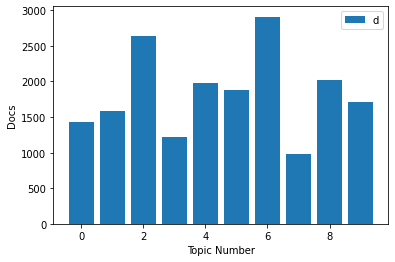

In [104]:
plt.bar(topic_dist.index, topic_dist['top_topic']) 
plt.xlabel("Topic Number") 
plt.ylabel("Docs") 
plt.legend(("docs number"), loc='best') 
plt.rcParams['figure.figsize'] = [5, 3]


plt.show()

### 본문 전처리

In [37]:
!pip install kiwipiepy flashtext

In [105]:
from tqdm.notebook import tqdm
tqdm.pandas()
from collections import Counter
import regex
import re
from kiwipiepy import Kiwi, Option
kiwi = Kiwi()
kiwi.prepare()

from flashtext import KeywordProcessor
kp = KeywordProcessor()

#### 

In [106]:
class Preprocessing :
    """
    sumary


    """
    
    def __init__(self, df) :
        self.df = df
        self.stopwords_list = [] #불용어 리스트(안에 문자열로 추가)
        self.synonym_dict = {"우크라이나/NNP" : ['우크라/NNP']} # 동의어 딕셔너리
    
    """
    def only_kor(self) :
        list_par = []
        for i in self.df.index :
            for idx in self.df['본문'][i] :

                text = re.sub('[^가-힣]', '', idx).strip() #한글만
                
                if(text!=''):
                    list_par.append(text)
        print(self.df)
    """
    

    def tokenize_tag(self, sent): # 토큰화 및 품사 태깅
      res, score = kiwi.analyze(sent)[0] # 첫번째 결과를 사용
      return [word + ('다' if tag.startswith('V') else '') +'/'+tag # 동사에는 '다'를 붙여줌 + / 품사
              for word, tag, _, _ in res
              if not tag.startswith('E') and not tag.startswith('J') and not tag.startswith('S') and not tag.startswith('X')] # 조사, 어미, 특수기호 포함된 단어는 제거
    def tokenize(self) :
        self.df['token'] = self.df['본문'].progress_map(lambda x:self.tokenize_tag(x))
    
    def elim_stopwords(self, words=[]): # 불용어 제거
        self.stopwords_list.extend(words)
        self.df['token'] = self.df['token'].map(lambda x:[w for w in x if not w in self.stopwords_list]) 
        
    def synonym(self) : # 동의어 처리
        kp.add_keywords_from_dict(self.synonym_dict)
        df['token'] = [[kp.replace_keywords(x) for x in w] for w in tqdm(df['token'])]

In [107]:
# 클래스 불러오기
preprocess = Preprocessing(df)

In [108]:
df['본문']

0        윤석열 정부의 국정 지지율이 추락했다. 지난 5월 10일 출범한 윤석열 정부가 이렇...
1        [헤럴드경제=홍성원 기자]미국이 우크라이나 전쟁 이후 유럽에 대한 액화천연가스(LN...
2        삼성전자가 '국민주'로 불리는 이유는 국민 10명 중 1명이 주주이기 때문입니다. ...
3        우크라이나 전쟁을 계기로 러시아가 유럽에 대한 천연가스의 공급을 줄이면서 미국이 세...
4        ET라씨로는 인공지능(AI) 기반으로 선별 분석한 주식 정보와 종목 매매 신호를 제...
                               ...                        
18309    김영호 사천경찰서장은 지난 22일 우크라이나 사태의 평화적 해결을 기원하는 ‘우크라...
18310    1분기 영업익 1조9289억 \n\n \n\n \n\n \n \n \n \n \n ...
18311    경제5단체, 이재용 신동빈 등 \n석가탄신일 특별사면복권 청원 \n이건희 '동계올림...
18312    긴축 국채불안 맞설 유일한 카드 \nMS 1분기 매출 18% 증가 예상 \n알파벳 ...
18313    1분기 실적발표 콘퍼런스 콜 \n원자재 전담조직 만들어 관리 \n전기차 원가상승 압...
Name: 본문, Length: 18314, dtype: object

In [109]:
preprocess.tokenize()

  0%|          | 0/18314 [00:00<?, ?it/s]

In [110]:
df

,일자,언론사,제목,통합 분류1,인물,위치,키워드,특성추출(가중치순 상위 50개),본문,top_topic,topic_dist,topic_words,token
0,20220726,매일신문,[수요일 아침] 윤 대통령의 지지율 추락,정치,"[문, 윤석열, 검찰총장, 배한동]","[서해, 우크라이나, 경기, 북송, 한국, 탕평]","[대통령, 지지율, 추락, 명예교수, 배한동, 경북대, 명예, 교수, 윤석열, 정부...","지지율,윤석열,공무원,협치,지지층,스테핑,경북대,배한동,서해",윤석열 정부의 국정 지지율이 추락했다. 지난 5월 10일 출범한 윤석열 정부가 이렇...,3,"[(3, 0.7764617204666138), (9, 0.07608439773321...","국민, 의원, 대표, 정부, 말씀, 민주당, 윤석열, 국회, 얘기, 이준석","[윤석열/NNP, 정부/NNG, 국정/NNG, 지지/NNG, 추락/NNG, 지나다/..."
1,20220726,헤럴드경제,"美, 우크라戰 덕에 상반기 최대 LNG 수출국 돼",국제,NaN,"[우크라이나, 걸프만, 미국, 사빈패스, 우크라, 유럽, 카타르, 네덜란드, 아프리...","[우크라, 상반기, 최대, LNG, 수출국, 미국, 우크라이나, 전쟁, 유럽, 액화...","상반기,미국,유럽,lng,러시아,천연가스,일평균,우크라이나,입방피트,수출량,국가들,...",[헤럴드경제=홍성원 기자]미국이 우크라이나 전쟁 이후 유럽에 대한 액화천연가스(LN...,5,"[(5, 0.3919093608856201), (1, 0.26179784536361...","가격, 물가, 상승, 곡물, 식량, 휘발유, 경유, 식용유, 인하, 수출","[헤럴드/NNP, 경제/NNG, 홍성원/NNP, 기자/NNG, 미국/NNP, 우크라..."
2,20220726,한국경제,"[마켓프로] 삼성전자, 지금 담아야 할까 눈여겨볼 포인트 세 가지",경제,"[박유악, 김동원, 김운호, 최도연]","[우크라이나, 미국, 경기, 텍사스, 신흥국]","[삼성전자, 포인트, 가지, 삼성전자, 국민주, 국민, 1명, 주주, 연초, 전자,...","삼성전자,반도체,연구원,증권가,목표주가,외국인,영업이익,증권사,미국,투자자,상반기,...",삼성전자가 '국민주'로 불리는 이유는 국민 10명 중 1명이 주주이기 때문입니다. ...,1,"[(1, 0.5908738374710083), (6, 0.37090492248535...","실적, 수출, 매출, 반도체, 증가, 적자, 삼성전자, 달러, 전년, 감소","[삼성전자/NNP, 국민주/NNG, 불리다/VV, 이유/NNG, 국민/NNG, 명/..."
3,20220726,YTN,"美, 상반기 액화천연가스 수출 1위...유럽이 71% '싹쓸이'",경제,NaN,"[우크라이나, 영국, 유럽, 카타르, 아프리카, 美]","[상반기, 천연가스, 수출, 유럽, 71%, 싹쓸이, 우크라이나, 전쟁, 계기, 러...","유럽,미국,천연가스,상반기,러시아,lng,우크라이나,아프리카,세제곱,정보청,유럽연합...",우크라이나 전쟁을 계기로 러시아가 유럽에 대한 천연가스의 공급을 줄이면서 미국이 세...,1,"[(1, 0.38822633028030396), (4, 0.3104307949542...","실적, 수출, 매출, 반도체, 증가, 적자, 삼성전자, 달러, 전년, 감소","[우크라이나/NNP, 전쟁/NNG, 계기/NNG, 러시아/NNP, 유럽/NNP, 대..."
4,20220726,전자신문,[ET라씨로] 국제 펄프가격 1000달러 돌파...신풍제지 등 제지株↑,경제,NaN,"[우크라이나, 미국, 장, 남부산, 러시아]","[국제, 펄프, 가격, 달러, 돌파, 신풍제지, 제지, ET라씨, 인공지능, AI,...","ai,신풍제지,전자신문,실시간,씽크풀,1000달러,미국,유가증권시장,무림페이퍼,영풍...",ET라씨로는 인공지능(AI) 기반으로 선별 분석한 주식 정보와 종목 매매 신호를 제...,1,"[(1, 0.9837011694908142), (4, 0.01529500912874...","실적, 수출, 매출, 반도체, 증가, 적자, 삼성전자, 달러, 전년, 감소","[라씨로/NNG, 인공/NNG, 지능/NNG, 기반/NNG, 선별/NNG, 분석/N..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18309,20220426,경남신문,함께해요 ‘우크라이나에 평화를’ 챌린지,국제,NaN,[우크라이나],"[우크라이나, 평화, 챌린지, 김영호, 사천경찰, 서장, 김영호, 사천경찰서장, 사...","우크라이나,김영호,우크,라이나인,우크라이나인들,사천경찰서장,사천경찰,평화,전쟁,서장...",김영호 사천경찰서장은 지난 22일 우크라이나 사태의 평화적 해결을 기원하는 ‘우크라...,9,"[(9, 0.6348693370819092), (3, 0.35917091369628...","난민, 작품, 평화, 고려인, 영화, 사람, 여성, 공연, 사람들, 아이들","[김영호/NNP, 사천/NNP, 경찰서장/NNG, 지나다/VV, 일/NNB, 우크라..."
18310,20220426,파이낸셜뉴스,3중 악재 넘었다... 현대차 깜짝실적 [현대차 기아 실적 선방],경제,[서강현],"[우호, 우크라이나, 서울, 중국, 유럽, 러시아-우크라이나 전쟁]","[악재, 현대차, 현대차, 기아, 실적, 선방, 1조, 영업익, 현대자동차, 기아,...","현대차,반도체,매출액,1조,중국,콘퍼런스콜,우크라이나,영업이익,서강현,코로나",1분기 영업익 1조9289억 \n\n \n\n \n\n \n \n \n \n \n ...,1,"[(1, 0.92760169506073), (6, 0.0716432332992553...","실적, 수출, 매출, 반도체, 증가, 적자, 삼성전자, 달러, 전년, 감소","[분기/NNG, 영업익/NNG, 조/NR, 억/NR, 현대자동차/NNP, 기아/NN..."
18311,20220426,파이낸셜뉴스,"""경제위기 상황, 헌신할 기회를"" 기업인 사면론 힘받는다 [재계,이재용 사면 탄원]",경제,"[이명박, 박근혜, 이재용, 우태희, 문재인, 신동빈, 이, 이중근, 이건희, 최태원]","[우크라이나, 대전, 미, 한국]","[경제, 위기, 상황, 헌신, 기회, 기업, 사면론, 재계, 이재용, 사면, 탄원,...","삼성전자,부회장,청원,경쟁력,이재용,반도체,이건희,최태원,코로나19,기업인,박근혜,...","경제5단체, 이재용 신동빈 등 \n석가탄신일 특별사면복권 청원 \n이건희 '동계올림...",3,"[(3, 0.5539175868034363), (0, 0.34489881992340...","국민, 의원, 대표, 정부, 말씀, 민주당, 윤석열, 국회, 얘기, 이준석","[경제/NNG, 단체/NNG, 이재용/NNP, 신동빈/NNP, 등/NNB, 석가/N..."
18312,20220426,파이낸셜뉴스,"빅테크 실적만 기다리는 美증시 월가는 ""믿을 건 MS뿐"" [해외주식 인싸이트]",경제,[제롬 파월],"[하그리브스랜, 우크라이나, 미국, 유럽, 뉴욕, 미, 뉴욕증, 아마존, 러시아]","[빅테크, 실적, 증시, 월가, MS, 해외, 주식, 인싸이트, 긴축, 국채불안, ...","ms,빅테크,실적발표,미국,우크라이나,팩트셋,월가,코로나19,실망감,eps,연준,인...",긴축 국채불안 맞설 유일한 카드 \nMS 1분기 매출 18% 증가 예상 \n알파벳 ...,6,"[(6, 0.7648946046829224), (1, 0.13443593680858...","금리, 물가, 인플레이션, 인상, 경기, 연준, 달러, 경제, 하락, 상승","[긴축/NNG, 국채/NNG, 불안/NNG, 맞서다/VV, 유일/NNG, 카드/NN..."


In [44]:
preprocess.elim_stopwords(['이다/VCP','하다/VV','하다/VX','위하다/VV','되다/VV','있다/VV', '있다/VX','없다/VA','않다/VX','있다/VV'])

In [45]:
preprocess.synonym()

  0%|          | 0/18314 [00:00<?, ?it/s]

#### 전처리된 본문을 통한 토픽모델링

In [53]:
import tomotopy as tp
print(tp.isa)
import sys
import numpy as np
import logging


import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
import matplotlib.colors as clr
from matplotlib.colors import ListedColormap
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

sse2


In [111]:
class TopicModeling :
    
    def __init__(self, df, k, min_df=5 ) : #df = 데이터, k은 토픽 개수, min_df =10
        self.df = df
        self.k = k
        self.min_df= min_df
    
            
    def LDA(self) :
        
        LDA_model = tp.LDAModel(k= self.k, min_df=self.min_df, tw= tp.TermWeight.IDF, rm_top=5, alpha=0.1, eta= 0.01, seed=2022 )
        for token in self.df['token'].tolist():
            LDA_model.add_doc(token)

        return LDA_model
       
        
    def train(self, LDA_model) :
        LDA_model.train(0)
        print('Num docs:', len(LDA_model.docs), ', Vocab size:', LDA_model.num_vocabs, ', Num words:', LDA_model.num_words)
        print('Removed top words:', LDA_model.removed_top_words) #확인
        print('Training...', file=sys.stderr, flush=True)
        for i in range(0, 500, 100):
            LDA_model.train(100)
            print('Iteration: {}\tLog-likelihood: {}'.format(i, LDA_model.ll_per_word))

    def result(self, LDA_model) :
        for i in range(LDA_model.k):
          res = LDA_model.get_topic_words(i, top_n=20)
          print('Topic #{}'.format(i), end='\t')
          print(', '.join(w for w, p in res))
            
    def get_coherence(self, LDA_model) :
        coherence = tp.coherence
        score = coherence.Coherence(LDA_model).get_score()
        perplexity = LDA_model.perplexity
        print('topic 개수 : ', self.k , '| 사용된 vocab 수 : ',len(LDA_model.used_vocabs) ,'| Coherence 점수 : ', score, '| Perplexity 점수 : ', np.log(perplexity))
    

        return score, perplexity

In [142]:
#전처리 이후 빈 리스트 제거(영어 기사)
df = df.drop([idx for idx, x in enumerate(df['token']) if len(x)==0])
df.reset_index(drop=True, inplace=True)
df

,일자,언론사,제목,통합 분류1,인물,위치,키워드,특성추출(가중치순 상위 50개),본문,top_topic,topic_dist,topic_words,token
0,20220726,매일신문,[수요일 아침] 윤 대통령의 지지율 추락,정치,"[문, 윤석열, 검찰총장, 배한동]","[서해, 우크라이나, 경기, 북송, 한국, 탕평]","[대통령, 지지율, 추락, 명예교수, 배한동, 경북대, 명예, 교수, 윤석열, 정부...","지지율,윤석열,공무원,협치,지지층,스테핑,경북대,배한동,서해",윤석열 정부의 국정 지지율이 추락했다. 지난 5월 10일 출범한 윤석열 정부가 이렇...,6,"[(6, 0.47063136100769043), (3, 0.4033499062061...","물가/NNG, 금리/NNG, 상승/NNG, 경기/NNG, 인상/NNG, 경제/NNG...","[윤석열/NNP, 정부/NNG, 국정/NNG, 지지/NNG, 추락/NNG, 지나다/..."
1,20220726,헤럴드경제,"美, 우크라戰 덕에 상반기 최대 LNG 수출국 돼",국제,NaN,"[우크라이나, 걸프만, 미국, 사빈패스, 우크라, 유럽, 카타르, 네덜란드, 아프리...","[우크라, 상반기, 최대, LNG, 수출국, 미국, 우크라이나, 전쟁, 유럽, 액화...","상반기,미국,유럽,lng,러시아,천연가스,일평균,우크라이나,입방피트,수출량,국가들,...",[헤럴드경제=홍성원 기자]미국이 우크라이나 전쟁 이후 유럽에 대한 액화천연가스(LN...,9,"[(9, 0.4400692284107208), (8, 0.42754068970680...","분기/NNG, 억/NR, 원/NNB, 조/NR, 기업/NNG, 실적/NNG, 만/N...","[헤럴드/NNP, 경제/NNG, 홍성원/NNP, 기자/NNG, 미국/NNP, 우크라..."
2,20220726,한국경제,"[마켓프로] 삼성전자, 지금 담아야 할까 눈여겨볼 포인트 세 가지",경제,"[박유악, 김동원, 김운호, 최도연]","[우크라이나, 미국, 경기, 텍사스, 신흥국]","[삼성전자, 포인트, 가지, 삼성전자, 국민주, 국민, 1명, 주주, 연초, 전자,...","삼성전자,반도체,연구원,증권가,목표주가,외국인,영업이익,증권사,미국,투자자,상반기,...",삼성전자가 '국민주'로 불리는 이유는 국민 10명 중 1명이 주주이기 때문입니다. ...,6,"[(6, 0.7671031355857849), (5, 0.23150826990604...","물가/NNG, 금리/NNG, 상승/NNG, 경기/NNG, 인상/NNG, 경제/NNG...","[삼성전자/NNP, 국민주/NNG, 불리다/VV, 이유/NNG, 국민/NNG, 명/..."
3,20220726,YTN,"美, 상반기 액화천연가스 수출 1위...유럽이 71% '싹쓸이'",경제,NaN,"[우크라이나, 영국, 유럽, 카타르, 아프리카, 美]","[상반기, 천연가스, 수출, 유럽, 71%, 싹쓸이, 우크라이나, 전쟁, 계기, 러...","유럽,미국,천연가스,상반기,러시아,lng,우크라이나,아프리카,세제곱,정보청,유럽연합...",우크라이나 전쟁을 계기로 러시아가 유럽에 대한 천연가스의 공급을 줄이면서 미국이 세...,8,"[(8, 0.7249674797058105), (9, 0.22376447916030...","에너지/NNG, 가스/NNG, 원유/NNG, 제재/NNG, 원전/NNG, 휘발유/N...","[우크라이나/NNP, 전쟁/NNG, 계기/NNG, 러시아/NNP, 유럽/NNP, 대..."
4,20220726,전자신문,[ET라씨로] 국제 펄프가격 1000달러 돌파...신풍제지 등 제지株↑,경제,NaN,"[우크라이나, 미국, 장, 남부산, 러시아]","[국제, 펄프, 가격, 달러, 돌파, 신풍제지, 제지, ET라씨, 인공지능, AI,...","ai,신풍제지,전자신문,실시간,씽크풀,1000달러,미국,유가증권시장,무림페이퍼,영풍...",ET라씨로는 인공지능(AI) 기반으로 선별 분석한 주식 정보와 종목 매매 신호를 제...,1,"[(1, 0.790138840675354), (4, 0.165205731987953...","방송/NNG, 내용/NNG, 회장/NNG, 있다/VV, 경제/NNG, 부총리/NNG...","[라씨로/NNG, 인공/NNG, 지능/NNG, 기반/NNG, 선별/NNG, 분석/N..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18295,20220426,경남신문,함께해요 ‘우크라이나에 평화를’ 챌린지,국제,NaN,[우크라이나],"[우크라이나, 평화, 챌린지, 김영호, 사천경찰, 서장, 김영호, 사천경찰서장, 사...","우크라이나,김영호,우크,라이나인,우크라이나인들,사천경찰서장,사천경찰,평화,전쟁,서장...",김영호 사천경찰서장은 지난 22일 우크라이나 사태의 평화적 해결을 기원하는 ‘우크라...,0,0,0,"[김영호/NNP, 사천/NNP, 경찰서장/NNG, 지나다/VV, 일/NNB, 우크라..."
18296,20220426,파이낸셜뉴스,3중 악재 넘었다... 현대차 깜짝실적 [현대차 기아 실적 선방],경제,[서강현],"[우호, 우크라이나, 서울, 중국, 유럽, 러시아-우크라이나 전쟁]","[악재, 현대차, 현대차, 기아, 실적, 선방, 1조, 영업익, 현대자동차, 기아,...","현대차,반도체,매출액,1조,중국,콘퍼런스콜,우크라이나,영업이익,서강현,코로나",1분기 영업익 1조9289억 \n\n \n\n \n\n \n \n \n \n \n ...,0,0,0,"[분기/NNG, 영업익/NNG, 조/NR, 억/NR, 현대자동차/NNP, 기아/NN..."
18297,20220426,파이낸셜뉴스,"""경제위기 상황, 헌신할 기회를"" 기업인 사면론 힘받는다 [재계,이재용 사면 탄원]",경제,"[이명박, 박근혜, 이재용, 우태희, 문재인, 신동빈, 이, 이중근, 이건희, 최태원]","[우크라이나, 대전, 미, 한국]","[경제, 위기, 상황, 헌신, 기회, 기업, 사면론, 재계, 이재용, 사면, 탄원,...","삼성전자,부회장,청원,경쟁력,이재용,반도체,이건희,최태원,코로나19,기업인,박근혜,...","경제5단체, 이재용 신동빈 등 \n석가탄신일 특별사면복권 청원 \n이건희 '동계올림...",0,0,0,"[경제/NNG, 단체/NNG, 이재용/NNP, 신동빈/NNP, 등/NNB, 석가/N..."
18298,20220426,파이낸셜뉴스,"빅테크 실적만 기다리는 美증시 월가는 ""믿을 건 MS뿐"" [해외주식 인싸이트]",경제,[제롬 파월],"[하그리브스랜, 우크라이나, 미국, 유럽, 뉴욕, 미, 뉴욕증, 아마존, 러시아]","[빅테크, 실적, 증시, 월가, MS, 해외, 주식, 인싸이트, 긴축, 국채불안, ...","ms,빅테크,실적발표,미국,우크라이나,팩트셋,월가,코로나19,실망감,eps,연준,인...",긴축 국채불안 맞설 유일한 카드 \nMS 1분기 매출 18% 증가 예상 \n알파벳 ...,0,0,0,"[긴축/NNG, 국채/NNG, 불안/NNG, 맞서다/VV, 유일/NNG, 카드/NN..."


In [136]:
lda = TopicModeling(df,10)
model = lda.LDA()
lda.train(model)
len(model.used_vocabs)
lda.result(model)

Training...


Num docs: 18300 , Vocab size: 10001 , Num words: 788368
Removed top words: ['이다/VCP', '우크라이나/NNP', '일/NNB', '러시아/NNP', '있다/VX']
Iteration: 0	Log-likelihood: -8.028558313652235
Iteration: 100	Log-likelihood: -7.915630406277073
Iteration: 200	Log-likelihood: -7.878957932647072
Iteration: 300	Log-likelihood: -7.8627489048524195
Iteration: 400	Log-likelihood: -7.852904673314887
Topic #0	대위/NNG, 이근/NNP, 씨/NNB, 의용군/NNG, 참전/NNG, 출신/NNG, 영국/NNP, 해군/NNG, 이/NNP, 전/NNG, 전단/NNG, 푸틴/NNP, 현지/NNG, 공개/NNG, 귀국/NNG, 특수/NNG, 영상/NNG, 부상/NNG, 유튜버/NNP, 전/MM
Topic #1	방송/NNG, 내용/NNG, 회장/NNG, 있다/VV, 경제/NNG, 부총리/NNG, 기술/NNG, 장관/NNG, 진행/NNG, 서울/NNP, 기업/NNG, 앵커/NNG, 부회장/NNG, 교수/NNG, 바라다/VV, 정확/NNG, 기획/NNG, 개최/NNG, 회의/NNG, 보다/MAG
Topic #2	대통령/NNG, 미국/NNP, 바이든/NNP, 정상/NNG, 나토/NNP, 중국/NNP, 회의/NNG, 조/NNP, 장관/NNG, 안보/NNG, 미/NNP, 회담/NNG, 북대서양조약기구/NNP, 국가/NNG, 현지/NNG, 외교/NNG, 가입/NNG, 북한/NNP, 푸틴/NNP, 핵/NNG
Topic #3	국민/NNG, 대표/NNG, 의원/NNG, 힘/NNG, 총리/NNG, 선거/NNG, 국회/NNG, 이준석/NNP, 일본/NNP, 윤석열/NNP, 임금/NNG, 당/NNG, 대통령/NNG, 정부

In [137]:
df

,일자,언론사,제목,통합 분류1,인물,위치,키워드,특성추출(가중치순 상위 50개),본문,top_topic,topic_dist,topic_words,token
0,20220726,매일신문,[수요일 아침] 윤 대통령의 지지율 추락,정치,"[문, 윤석열, 검찰총장, 배한동]","[서해, 우크라이나, 경기, 북송, 한국, 탕평]","[대통령, 지지율, 추락, 명예교수, 배한동, 경북대, 명예, 교수, 윤석열, 정부...","지지율,윤석열,공무원,협치,지지층,스테핑,경북대,배한동,서해",윤석열 정부의 국정 지지율이 추락했다. 지난 5월 10일 출범한 윤석열 정부가 이렇...,3,"[(3, 0.7764617204666138), (9, 0.07608439773321...","국민, 의원, 대표, 정부, 말씀, 민주당, 윤석열, 국회, 얘기, 이준석","[윤석열/NNP, 정부/NNG, 국정/NNG, 지지/NNG, 추락/NNG, 지나다/..."
1,20220726,헤럴드경제,"美, 우크라戰 덕에 상반기 최대 LNG 수출국 돼",국제,NaN,"[우크라이나, 걸프만, 미국, 사빈패스, 우크라, 유럽, 카타르, 네덜란드, 아프리...","[우크라, 상반기, 최대, LNG, 수출국, 미국, 우크라이나, 전쟁, 유럽, 액화...","상반기,미국,유럽,lng,러시아,천연가스,일평균,우크라이나,입방피트,수출량,국가들,...",[헤럴드경제=홍성원 기자]미국이 우크라이나 전쟁 이후 유럽에 대한 액화천연가스(LN...,5,"[(5, 0.3919093608856201), (1, 0.26179784536361...","가격, 물가, 상승, 곡물, 식량, 휘발유, 경유, 식용유, 인하, 수출","[헤럴드/NNP, 경제/NNG, 홍성원/NNP, 기자/NNG, 미국/NNP, 우크라..."
2,20220726,한국경제,"[마켓프로] 삼성전자, 지금 담아야 할까 눈여겨볼 포인트 세 가지",경제,"[박유악, 김동원, 김운호, 최도연]","[우크라이나, 미국, 경기, 텍사스, 신흥국]","[삼성전자, 포인트, 가지, 삼성전자, 국민주, 국민, 1명, 주주, 연초, 전자,...","삼성전자,반도체,연구원,증권가,목표주가,외국인,영업이익,증권사,미국,투자자,상반기,...",삼성전자가 '국민주'로 불리는 이유는 국민 10명 중 1명이 주주이기 때문입니다. ...,1,"[(1, 0.5908738374710083), (6, 0.37090492248535...","실적, 수출, 매출, 반도체, 증가, 적자, 삼성전자, 달러, 전년, 감소","[삼성전자/NNP, 국민주/NNG, 불리다/VV, 이유/NNG, 국민/NNG, 명/..."
3,20220726,YTN,"美, 상반기 액화천연가스 수출 1위...유럽이 71% '싹쓸이'",경제,NaN,"[우크라이나, 영국, 유럽, 카타르, 아프리카, 美]","[상반기, 천연가스, 수출, 유럽, 71%, 싹쓸이, 우크라이나, 전쟁, 계기, 러...","유럽,미국,천연가스,상반기,러시아,lng,우크라이나,아프리카,세제곱,정보청,유럽연합...",우크라이나 전쟁을 계기로 러시아가 유럽에 대한 천연가스의 공급을 줄이면서 미국이 세...,1,"[(1, 0.38822633028030396), (4, 0.3104307949542...","실적, 수출, 매출, 반도체, 증가, 적자, 삼성전자, 달러, 전년, 감소","[우크라이나/NNP, 전쟁/NNG, 계기/NNG, 러시아/NNP, 유럽/NNP, 대..."
4,20220726,전자신문,[ET라씨로] 국제 펄프가격 1000달러 돌파...신풍제지 등 제지株↑,경제,NaN,"[우크라이나, 미국, 장, 남부산, 러시아]","[국제, 펄프, 가격, 달러, 돌파, 신풍제지, 제지, ET라씨, 인공지능, AI,...","ai,신풍제지,전자신문,실시간,씽크풀,1000달러,미국,유가증권시장,무림페이퍼,영풍...",ET라씨로는 인공지능(AI) 기반으로 선별 분석한 주식 정보와 종목 매매 신호를 제...,1,"[(1, 0.9837011694908142), (4, 0.01529500912874...","실적, 수출, 매출, 반도체, 증가, 적자, 삼성전자, 달러, 전년, 감소","[라씨로/NNG, 인공/NNG, 지능/NNG, 기반/NNG, 선별/NNG, 분석/N..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18309,20220426,경남신문,함께해요 ‘우크라이나에 평화를’ 챌린지,국제,NaN,[우크라이나],"[우크라이나, 평화, 챌린지, 김영호, 사천경찰, 서장, 김영호, 사천경찰서장, 사...","우크라이나,김영호,우크,라이나인,우크라이나인들,사천경찰서장,사천경찰,평화,전쟁,서장...",김영호 사천경찰서장은 지난 22일 우크라이나 사태의 평화적 해결을 기원하는 ‘우크라...,9,"[(9, 0.6348693370819092), (3, 0.35917091369628...","난민, 작품, 평화, 고려인, 영화, 사람, 여성, 공연, 사람들, 아이들","[김영호/NNP, 사천/NNP, 경찰서장/NNG, 지나다/VV, 일/NNB, 우크라..."
18310,20220426,파이낸셜뉴스,3중 악재 넘었다... 현대차 깜짝실적 [현대차 기아 실적 선방],경제,[서강현],"[우호, 우크라이나, 서울, 중국, 유럽, 러시아-우크라이나 전쟁]","[악재, 현대차, 현대차, 기아, 실적, 선방, 1조, 영업익, 현대자동차, 기아,...","현대차,반도체,매출액,1조,중국,콘퍼런스콜,우크라이나,영업이익,서강현,코로나",1분기 영업익 1조9289억 \n\n \n\n \n\n \n \n \n \n \n ...,1,"[(1, 0.92760169506073), (6, 0.0716432332992553...","실적, 수출, 매출, 반도체, 증가, 적자, 삼성전자, 달러, 전년, 감소","[분기/NNG, 영업익/NNG, 조/NR, 억/NR, 현대자동차/NNP, 기아/NN..."
18311,20220426,파이낸셜뉴스,"""경제위기 상황, 헌신할 기회를"" 기업인 사면론 힘받는다 [재계,이재용 사면 탄원]",경제,"[이명박, 박근혜, 이재용, 우태희, 문재인, 신동빈, 이, 이중근, 이건희, 최태원]","[우크라이나, 대전, 미, 한국]","[경제, 위기, 상황, 헌신, 기회, 기업, 사면론, 재계, 이재용, 사면, 탄원,...","삼성전자,부회장,청원,경쟁력,이재용,반도체,이건희,최태원,코로나19,기업인,박근혜,...","경제5단체, 이재용 신동빈 등 \n석가탄신일 특별사면복권 청원 \n이건희 '동계올림...",3,"[(3, 0.5539175868034363), (0, 0.34489881992340...","국민, 의원, 대표, 정부, 말씀, 민주당, 윤석열, 국회, 얘기, 이준석","[경제/NNG, 단체/NNG, 이재용/NNP, 신동빈/NNP, 등/NNB, 석가/N..."
18312,20220426,파이낸셜뉴스,"빅테크 실적만 기다리는 美증시 월가는 ""믿을 건 MS뿐"" [해외주식 인싸이트]",경제,[제롬 파월],"[하그리브스랜, 우크라이나, 미국, 유럽, 뉴욕, 미, 뉴욕증, 아마존, 러시아]","[빅테크, 실적, 증시, 월가, MS, 해외, 주식, 인싸이트, 긴축, 국채불안, ...","ms,빅테크,실적발표,미국,우크라이나,팩트셋,월가,코로나19,실망감,eps,연준,인...",긴축 국채불안 맞설 유일한 카드 \nMS 1분기 매출 18% 증가 예상 \n알파벳 ...,6,"[(6, 0.7648946046829224), (1, 0.13443593680858...","금리, 물가, 인플레이션, 인상, 경기, 연준, 달러, 경제, 하락, 상승","[긴축/NNG, 국채/NNG, 불안/NNG, 맞서다/VV, 유일/NNG, 카드/NN..."


In [138]:
model.summary()

<Basic Info>
| LDAModel (current version: 0.12.2)
| 18300 docs, 788368 words
| Total Vocabs: 27701, Used Vocabs: 10001
| Entropy of words: 7.71586
| Entropy of term-weighted words: 8.34882
| Removed Vocabs: 이다/VCP 우크라이나/NNP 일/NNB 러시아/NNP 있다/VX
|
<Training Info>
| Iterations: 500, Burn-in steps: 0
| Optimization Interval: 10
| Log-likelihood per word: -7.85290
|
<Initial Parameters>
| tw: TermWeight.IDF
| min_cf: 0 (minimum collection frequency of words)
| min_df: 5 (minimum document frequency of words)
| rm_top: 5 (the number of top words to be removed)
| k: 10 (the number of topics between 1 ~ 32767)
| alpha: [0.1] (hyperparameter of Dirichlet distribution for document-topic, given as a single `float` in case of symmetric prior and as a list with length `k` of `float` in case of asymmetric prior.)
| eta: 0.01 (hyperparameter of Dirichlet distribution for topic-word)
| seed: 2022 (random seed)
| trained in version 0.12.2
|
<Parameters>
| alpha (Dirichlet prior on the per-document topic

In [141]:
len(model.docs)

18300

In [143]:
df['top_topic'] = 0
df['topic_dist'] = 0
df['topic_words']= 0

for i in tqdm(range(len(model.docs))) :
  
  df['topic_dist'][i] = model.docs[i].get_topics(top_n=10)
  df['top_topic'][i] = model.docs[i].get_topics()[0][0]
  res=model.get_topic_words(df['top_topic'][i], top_n=10)
  df['topic_words'][i] =', '.join(w for w, p in res)

df.head()

  0%|          | 0/18300 [00:00<?, ?it/s]

/var/folders/q9/1ydypryj47n2g37569rqj0p80000gn/T/ipykernel_88724/1560409385.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['topic_dist'][i] = model.docs[i].get_topics(top_n=10)
/var/folders/q9/1ydypryj47n2g37569rqj0p80000gn/T/ipykernel_88724/1560409385.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['top_topic'][i] = model.docs[i].get_topics()[0][0]
/var/folders/q9/1ydypryj47n2g37569rqj0p80000gn/T/ipykernel_88724/1560409385.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

,일자,언론사,제목,통합 분류1,인물,위치,키워드,특성추출(가중치순 상위 50개),본문,top_topic,topic_dist,topic_words,token
0,20220726,매일신문,[수요일 아침] 윤 대통령의 지지율 추락,정치,"[문, 윤석열, 검찰총장, 배한동]","[서해, 우크라이나, 경기, 북송, 한국, 탕평]","[대통령, 지지율, 추락, 명예교수, 배한동, 경북대, 명예, 교수, 윤석열, 정부...","지지율,윤석열,공무원,협치,지지층,스테핑,경북대,배한동,서해",윤석열 정부의 국정 지지율이 추락했다. 지난 5월 10일 출범한 윤석열 정부가 이렇...,6,"[(6, 0.47063136100769043), (3, 0.4033499062061...","물가/NNG, 금리/NNG, 상승/NNG, 경기/NNG, 인상/NNG, 경제/NNG...","[윤석열/NNP, 정부/NNG, 국정/NNG, 지지/NNG, 추락/NNG, 지나다/..."
1,20220726,헤럴드경제,"美, 우크라戰 덕에 상반기 최대 LNG 수출국 돼",국제,NaN,"[우크라이나, 걸프만, 미국, 사빈패스, 우크라, 유럽, 카타르, 네덜란드, 아프리...","[우크라, 상반기, 최대, LNG, 수출국, 미국, 우크라이나, 전쟁, 유럽, 액화...","상반기,미국,유럽,lng,러시아,천연가스,일평균,우크라이나,입방피트,수출량,국가들,...",[헤럴드경제=홍성원 기자]미국이 우크라이나 전쟁 이후 유럽에 대한 액화천연가스(LN...,9,"[(9, 0.4400692284107208), (8, 0.42754068970680...","분기/NNG, 억/NR, 원/NNB, 조/NR, 기업/NNG, 실적/NNG, 만/N...","[헤럴드/NNP, 경제/NNG, 홍성원/NNP, 기자/NNG, 미국/NNP, 우크라..."
2,20220726,한국경제,"[마켓프로] 삼성전자, 지금 담아야 할까 눈여겨볼 포인트 세 가지",경제,"[박유악, 김동원, 김운호, 최도연]","[우크라이나, 미국, 경기, 텍사스, 신흥국]","[삼성전자, 포인트, 가지, 삼성전자, 국민주, 국민, 1명, 주주, 연초, 전자,...","삼성전자,반도체,연구원,증권가,목표주가,외국인,영업이익,증권사,미국,투자자,상반기,...",삼성전자가 '국민주'로 불리는 이유는 국민 10명 중 1명이 주주이기 때문입니다. ...,6,"[(6, 0.7671031355857849), (5, 0.23150826990604...","물가/NNG, 금리/NNG, 상승/NNG, 경기/NNG, 인상/NNG, 경제/NNG...","[삼성전자/NNP, 국민주/NNG, 불리다/VV, 이유/NNG, 국민/NNG, 명/..."
3,20220726,YTN,"美, 상반기 액화천연가스 수출 1위...유럽이 71% '싹쓸이'",경제,NaN,"[우크라이나, 영국, 유럽, 카타르, 아프리카, 美]","[상반기, 천연가스, 수출, 유럽, 71%, 싹쓸이, 우크라이나, 전쟁, 계기, 러...","유럽,미국,천연가스,상반기,러시아,lng,우크라이나,아프리카,세제곱,정보청,유럽연합...",우크라이나 전쟁을 계기로 러시아가 유럽에 대한 천연가스의 공급을 줄이면서 미국이 세...,8,"[(8, 0.7249674797058105), (9, 0.22376447916030...","에너지/NNG, 가스/NNG, 원유/NNG, 제재/NNG, 원전/NNG, 휘발유/N...","[우크라이나/NNP, 전쟁/NNG, 계기/NNG, 러시아/NNP, 유럽/NNP, 대..."
4,20220726,전자신문,[ET라씨로] 국제 펄프가격 1000달러 돌파...신풍제지 등 제지株↑,경제,NaN,"[우크라이나, 미국, 장, 남부산, 러시아]","[국제, 펄프, 가격, 달러, 돌파, 신풍제지, 제지, ET라씨, 인공지능, AI,...","ai,신풍제지,전자신문,실시간,씽크풀,1000달러,미국,유가증권시장,무림페이퍼,영풍...",ET라씨로는 인공지능(AI) 기반으로 선별 분석한 주식 정보와 종목 매매 신호를 제...,1,"[(1, 0.790138840675354), (4, 0.165205731987953...","방송/NNG, 내용/NNG, 회장/NNG, 있다/VV, 경제/NNG, 부총리/NNG...","[라씨로/NNG, 인공/NNG, 지능/NNG, 기반/NNG, 선별/NNG, 분석/N..."


#### 시각화

In [144]:
topic_dist=df['top_topic'].value_counts()
topic_dist = pd.DataFrame(topic_dist)
topic_dist

,top_topic
6,3264
2,3259
7,2553
5,1875
9,1736
4,1562
8,1142
1,1111
3,905
0,893


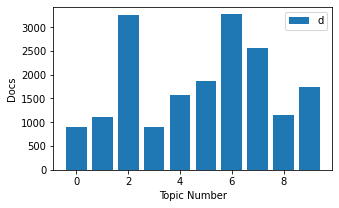

In [145]:
plt.bar(topic_dist.index, topic_dist['top_topic']) 
plt.xlabel("Topic Number") 
plt.ylabel("Docs") 
plt.legend(("docs number"), loc='best') 
plt.rcParams['figure.figsize'] = [20, 20]


plt.show()

### DMR 
메타데이터를 추가해서 메타데이터 별로 토픽 확인

폰트 설정

In [146]:
import   matplotlib.font_manager as fm

font_list=[font.name for font in fm.fontManager.ttflist]
font_list

['STIXSizeOneSym',
 'STIXSizeOneSym',
 'DejaVu Sans Mono',
 'cmb10',
 'STIXSizeThreeSym',
 'cmsy10',
 'STIXGeneral',
 'STIXSizeFourSym',
 'DejaVu Serif',
 'STIXSizeThreeSym',
 'STIXNonUnicode',
 'DejaVu Sans Mono',
 'DejaVu Serif',
 'DejaVu Sans',
 'DejaVu Sans Mono',
 'DejaVu Serif',
 'cmss10',
 'STIXGeneral',
 'STIXSizeTwoSym',
 'STIXGeneral',
 'STIXNonUnicode',
 'STIXSizeFiveSym',
 'DejaVu Sans Mono',
 'STIXGeneral',
 'cmtt10',
 'cmmi10',
 'cmex10',
 'DejaVu Serif',
 'STIXSizeFourSym',
 'DejaVu Sans',
 'STIXNonUnicode',
 'STIXSizeTwoSym',
 'DejaVu Serif Display',
 'cmr10',
 'DejaVu Sans Display',
 'DejaVu Sans',
 'DejaVu Sans',
 'STIXNonUnicode',
 'Kohinoor Gujarati',
 'Sathu',
 'Shree Devanagari 714',
 'Snell Roundhand',
 'Nadeem',
 'Diwan Thuluth',
 'Apple SD Gothic Neo',
 'PT Sans',
 'Luminari',
 'Noto Sans Lydian',
 'Noto Sans Phoenician',
 'Noto Sans Gothic',
 'DIN Alternate',
 'Hiragino Sans',
 'Gurmukhi MN',
 'Baskerville',
 'Apple Braille',
 'Noto Sans Sora Sompeng',
 'STIXV

In [147]:
#Mac OS 사용시
plt.rcParams['font.family']= 'AppleGothic'

In [ ]:
#Window OS 사용시
plt.rcParams['font.family']= 'NanumGothic'

In [148]:
# DMR 시각화
import seaborn as sns


def dmr_plot2(mdl):
    meta_dict = mdl.metadata_dict # 메타 데이터 종류 1개
    meta_k_arr = np.zeros((len(meta_dict), mdl.k))

    for i in range(len(meta_dict)):
        meta_k_arr[i, :] = np.exp(mdl.lambdas)[:, i] / np.exp(mdl.lambdas)[:, i].sum()

    viz_df = pd.DataFrame(meta_k_arr, columns=['Topic #{}'.format(k) for k in range(mdl.k)], index=meta_dict)
    fig1 = plt.figure(figsize=(15, 8))
    ax = plt.gca()
    assert plt.gcf() is fig1  # succeeds
    viz_df.sort_index(ascending=False).plot(kind='barh', stacked=True,
                                            colormap=ListedColormap(sns.color_palette('husl', 54)),
                                            ax=ax)  # draws to fig1 now

    #sns.barplot(x='group', y='Values', data=df, estimator=lambda x: sum(x==0)*100.0/len(x))

    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    return viz_df

In [149]:
def DMR(df, topic_k=2) :
    global token_rate_dict
    DMR_news = tp.DMRModel(k=topic_k ,min_df=100,tw=tp.TermWeight.IDF, alpha = 0.01, seed=2021, rm_top=10)
    token_rate_dict = df[['token','통합 분류1']].to_dict('index') # 메타데이터 지정

    for k in tqdm(token_rate_dict.keys()):
        DMR_news.add_doc(token_rate_dict[k]['token'], str(token_rate_dict[k]['통합 분류1']))

    DMR_news.train(0)

    print('Num docs:', len(DMR_news.docs), ', Vocab size:', DMR_news.num_vocabs, ', Num words:', DMR_news.num_words)
    print('Removed top words:', DMR_news.removed_top_words)
    print('Training...', file=sys.stderr, flush=True)
    for i in range(0, 500, 20):
        DMR_news.train(20)
        print('Iteration: {}\tLog-likelihood: {}'.format(i, DMR_news.ll_per_word))


    print('--------------------------------------------------------------------------')


    DMR_news.summary()
    
    print('--------------------------------------------------------------------------')

    for i in range(DMR_news.k):
        res = DMR_news.get_topic_words(i, top_n=20)
        print('Topic #{}'.format(i), end='\t')
        print(', '.join(w for w, p in res))
    

    dmr_plot2(DMR_news)

    return DMR_news

  0%|          | 0/18300 [00:00<?, ?it/s]

Training...


Num docs: 18300 , Vocab size: 1271 , Num words: 547377
Removed top words: ['이다/VCP', '우크라이나/NNP', '일/NNB', '러시아/NNP', '있다/VX', '것/NNB', '전쟁/NNG', '등/NNB', '미국/NNP', '현지/NNG']
Iteration: 0	Log-likelihood: -6.9610230713303745
Iteration: 20	Log-likelihood: -6.816736444045502
Iteration: 40	Log-likelihood: -6.742747395748285
Iteration: 60	Log-likelihood: -6.7044141400759205
Iteration: 80	Log-likelihood: -6.685046152276167
Iteration: 100	Log-likelihood: -6.667104492039021
Iteration: 120	Log-likelihood: -6.649184360397857
Iteration: 140	Log-likelihood: -6.639546549815809
Iteration: 160	Log-likelihood: -6.630139857314312
Iteration: 180	Log-likelihood: -6.614839517899608
Iteration: 200	Log-likelihood: -6.6108641806956125
Iteration: 220	Log-likelihood: -6.597435228312489
Iteration: 240	Log-likelihood: -6.589985978993788
Iteration: 260	Log-likelihood: -6.5825596834171245
Iteration: 280	Log-likelihood: -6.575652863838334
Iteration: 300	Log-likelihood: -6.573699018535079
Iteration: 320	Log-likeliho

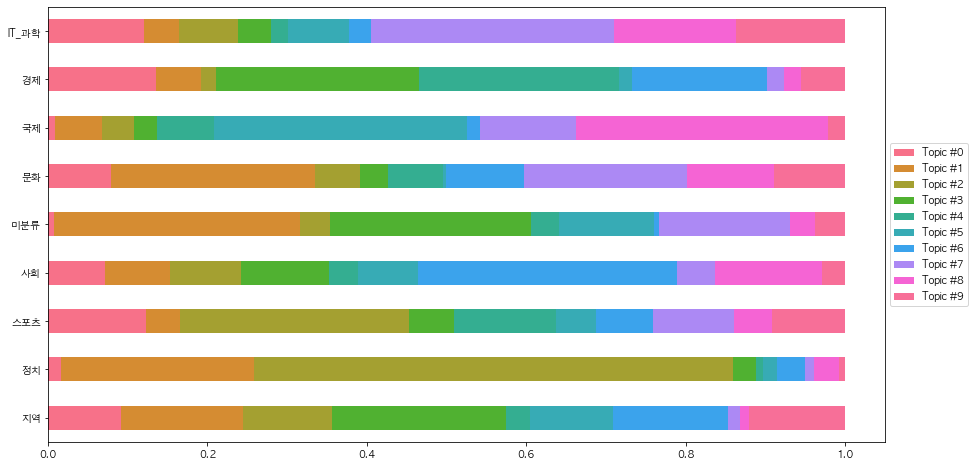

In [150]:
dmr = DMR(df, 10)